In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


# FiFa Dataset

In [2]:
# Path of the file to read
fifa_filepath = "/content/FIFA_20.csv"

# Read the file into a variable fifa_data
fifa_data = pd.read_csv(fifa_filepath)
fifa_data = fifa_data[['name','age','overall','preferred_foot','club','nationality']].copy()
fifa_data.rename(columns={'overall': 'rating'},inplace=True)
print(fifa_data.shape)
fifa_data.head()

(16042, 6)


,name,age,rating,preferred_foot,club,nationality
0,L. Messi,32,94,Left,FC Barcelona,Argentina
1,Cristiano Ronaldo,34,93,Right,Juventus,Portugal
2,Neymar Jr,27,92,Right,Paris Saint-Germain,Brazil
3,E. Hazard,28,91,Right,Real Madrid,Belgium
4,K. De Bruyne,28,91,Right,Manchester City,Belgium


Vamos a quedarnos solo con 3 equipos para analizarlos con más detalle.

In [3]:
options = ['Chelsea', 'Atlético Madrid','Napoli'] 
    # selecting rows based on condition 
fifa_subset = fifa_data[fifa_data['club'].isin(options)] 

In [4]:
print(fifa_subset.shape)
fifa_subset.head()

(87, 6)


,name,age,rating,preferred_foot,club,nationality
9,K. Koulibaly,28,89,Right,Napoli,Senegal
11,N. Kanté,28,89,Right,Chelsea,France
39,D. Mertens,32,87,Right,Napoli,Belgium
44,L. Insigne,28,87,Right,Napoli,Italy
68,Saúl,24,85,Left,Atlético Madrid,Spain


## Número de jugadores por equipo

Visualizamos el número de jugadores por equipo **countplot**

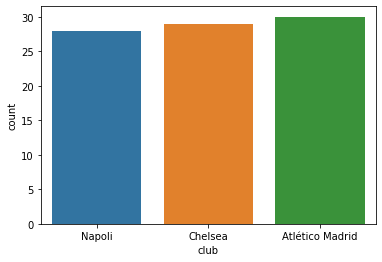

In [5]:
sns.countplot(x=fifa_subset['club'])
plt.show()

Contamos el numero de jugadores por la columna club con la variable value_counts()

In [6]:
fifa_subset['club'].value_counts()

Atlético Madrid    30
Chelsea            29
Napoli             28
Name: club, dtype: int64

## Funcion catplot
También se podría haber usado la función catplot pero usando el kind='count'

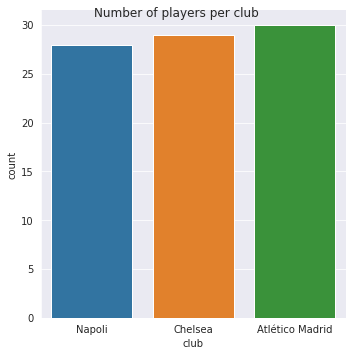

In [7]:
sns.set_style("darkgrid")
g = sns.catplot(x='club',data=fifa_subset,kind="count")
g.fig.suptitle("Number of players per club")
plt.show()

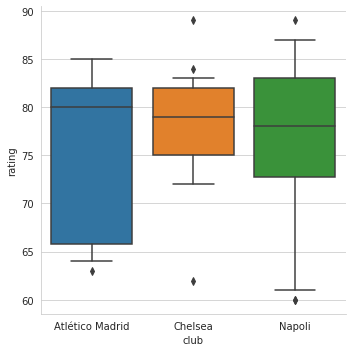

In [8]:
sns.color_palette()
sns.set_style("whitegrid")
sns.catplot(x="club", 
            y="rating",
            data=fifa_subset, 
            kind="box",
            whis=[5,95],  #Maximum length of the plot whiskers as proportion of the interquartile range
            order=['Atlético Madrid','Chelsea','Napoli']) # Establish the order
plt.show()

## ¿Por cada club, cuál es la edad media de sus jugadores según su preferred_foot? 

**Tip**: *Footedness is the natural preference of one's left or right foot for various purposes. It is the foot equivalent of handedness.*

Visualizamos esta información usando un **catplot**

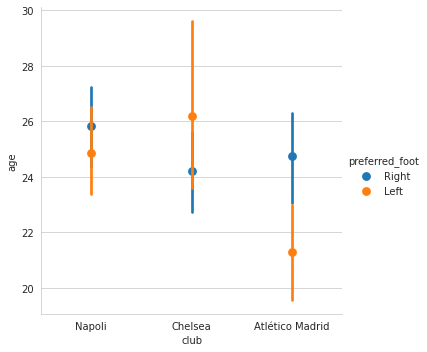

In [9]:
# catplot show relationship between a numerical and one or more categorical variables 

#sns.set_palette("RdBu",2)
sns.set_style("whitegrid")
sns.catplot(x="club", 
            y="age", 
            data=fifa_subset,
            hue="preferred_foot",
            kind="point", #The kind of plot to draw,
            join=False, 
            )
plt.show()

Podriamos haber obtenido esta información filtrando con pandas también.

In [10]:
fifa_subset[(fifa_subset['club'] == 'Napoli')].groupby('preferred_foot').agg( edad_media=('age', 'mean'))

,edad_media
preferred_foot,
Left,24.875
Right,25.850


In [11]:
fifa_subset[(fifa_subset['club'] == 'Chelsea')].groupby('preferred_foot').agg( edad_media=('age', 'mean'))

,edad_media
preferred_foot,
Left,26.200000
Right,24.208333


In [12]:
fifa_subset[(fifa_subset['club'] == 'Atlético Madrid')].groupby('preferred_foot').agg( edad_media=('age', 'mean'))

,edad_media
preferred_foot,
Left,21.285714
Right,24.739130


Otra forma de plotear la gráfica

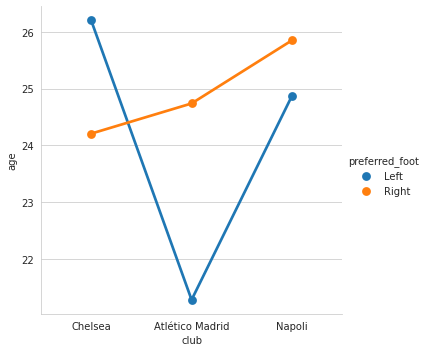

In [46]:
sns.catplot(x="club", 
            y="age", 
            data=fifa_subset,
            hue="preferred_foot",
            kind="point",
            ci=None,
            hue_order=['Left','Right'],
            order=['Chelsea','Atlético Madrid','Napoli'])
plt.show()

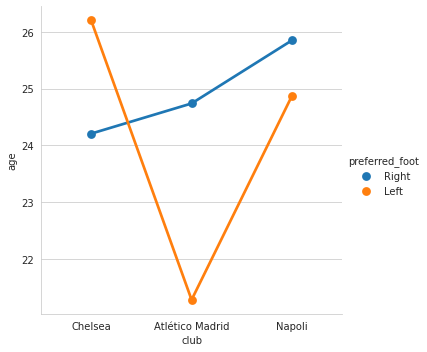

In [47]:
sns.catplot(x="club", 
            y="age", 
            data=fifa_subset,
            hue="preferred_foot",
            kind="point",
            ci=None,
            hue_order=['Right','Left'],
            order=['Chelsea','Atlético Madrid','Napoli'])
plt.show()

## Representación de la distribución de los jugadores según su edad y rating agrupado por preferred_foot

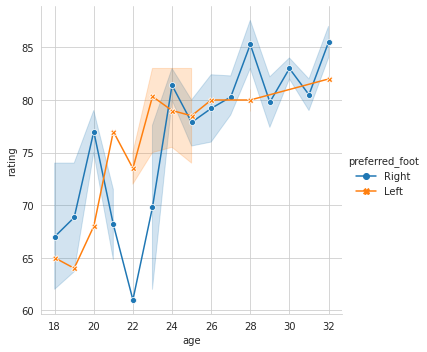

In [13]:
sns.set_style("whitegrid")
sns.relplot(x="age",
            y="rating",
            data=fifa_subset,
            kind="line",
            style="preferred_foot",
            hue="preferred_foot",
            markers=True,
            dashes=False)
plt.show()

## Mostrar distribución de elementos por rating y edad

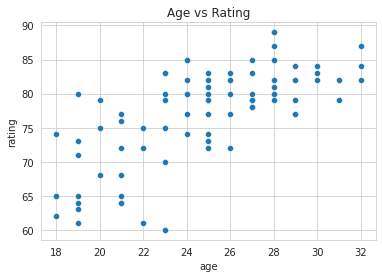

In [14]:
g=sns.scatterplot(x="age",
                    y="rating",
                    data=fifa_subset)
g.set_title("Age vs Rating")
plt.show()

## Mostrar la distribución de jugadores  por edad y ranking agrupados por su preferred foot

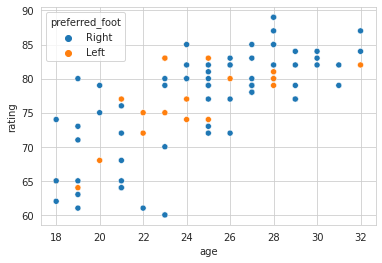

In [36]:
sns.scatterplot(x="age", 
                y="rating", 
                hue="preferred_foot", 
                data=fifa_subset)
plt.show()

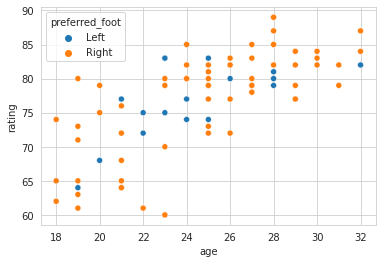

In [15]:
sns.scatterplot(x="age", 
            y="rating",
            hue="preferred_foot",
            data=fifa_subset, 
            hue_order=['Left','Right'])
plt.show()

## Mostrar la distribución de jugadores  por edad y su ranking agrupados por el club

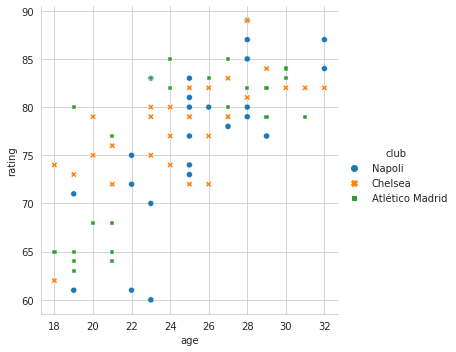

In [16]:
sns.relplot(x="age", 
            y="rating",
            kind="scatter",
            data=fifa_subset, 
            hue="club",
            style="club")
plt.show()

## ¿Para cada club, cuál es el ranking de los jugadores por edad?
Visualizar el ranking de los jugadores según su edad pero creando una gráfica por cada club. Usamos **replot**

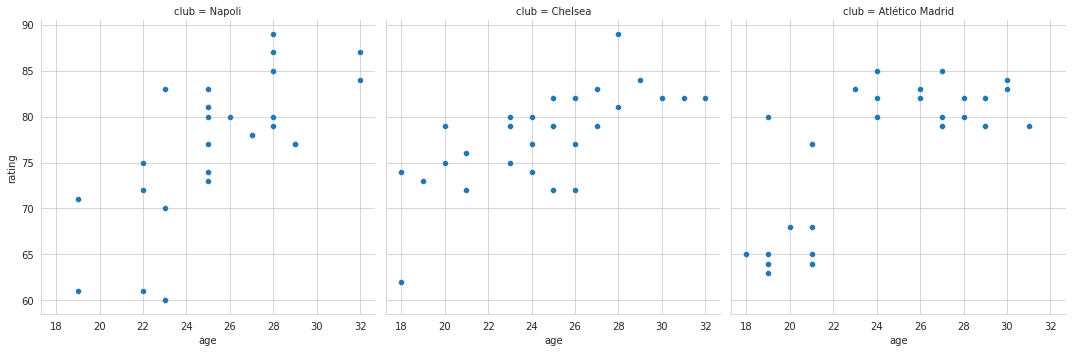

In [17]:
# relplot provides access to several different axes-level functions that show 
#the relationship between two variables with semantic mappings of subsets.

sns.relplot(x="age",
            y="rating",
            data=fifa_subset,
            kind="scatter",
            col="club", #Variables that define subsets to plot on different facets.
            col_wrap=3, #“Wrap” the column variable at this width, so that the column facets span multiple rows
            )
plt.show()

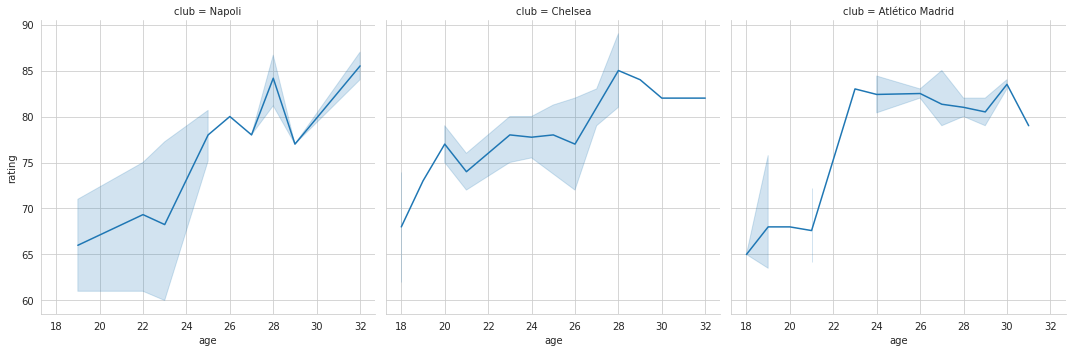

In [18]:
sns.relplot(x="age",
            y="rating",
            data=fifa_subset,
            kind="line",
            col="club", #Variables that define subsets to plot on different facets.
            col_wrap=3) #“Wrap” the column variable at this width, so that the column facets span multiple rows
plt.show()

## ¿Cuál es el ranking de los jugadores por edad segun su preferred_foot?

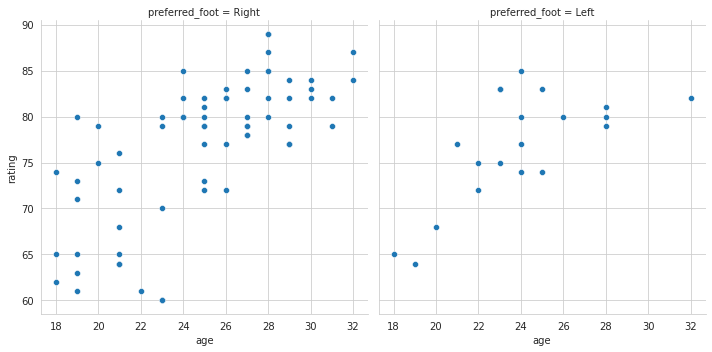

In [19]:
sns.relplot(x="age",
            y="rating",
            data=fifa_subset,
            kind="scatter",
            col="preferred_foot", #Variables that define subsets to plot on different facets.
            col_wrap=2, #“Wrap” the column variable at this width, so that the column facets span multiple rows
            )
plt.show()

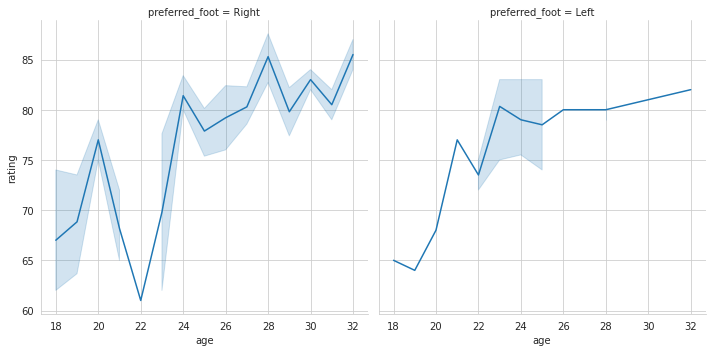

In [20]:
sns.relplot(x="age",
            y="rating",
            data=fifa_subset,
            kind="line",
            col="preferred_foot", #Variables that define subsets to plot on different facets.
            col_wrap=2) #“Wrap” the column variable at this width, so that the column facets span multiple rows
plt.show()

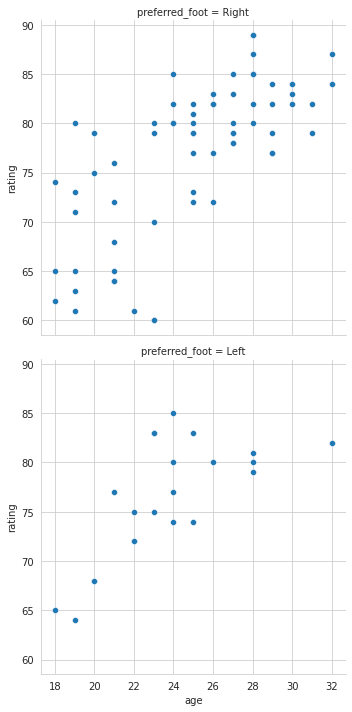

In [21]:
sns.relplot(x="age",
            y="rating",
            data=fifa_subset,
            kind="scatter",
            row='preferred_foot')
plt.show()

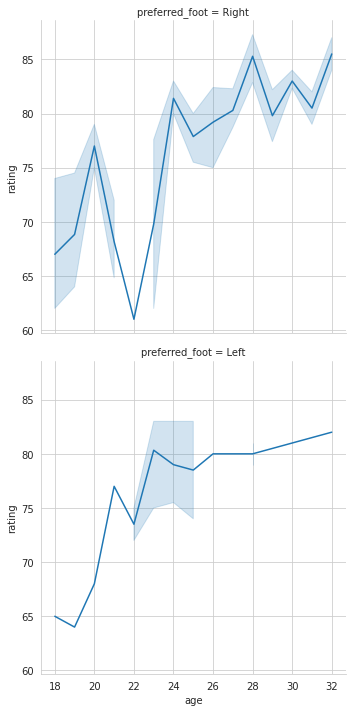

In [22]:
sns.relplot(x="age",
            y="rating",
            data=fifa_subset,
            kind="line",
            row="preferred_foot") 
plt.show()

## Visualizar por club y por su preferred foot, cuál es el ranking de los jugadores segun su edad?
Si quisieramos visualizar el ranking por edad pero dividiendo la visualización por preferred_foot y club

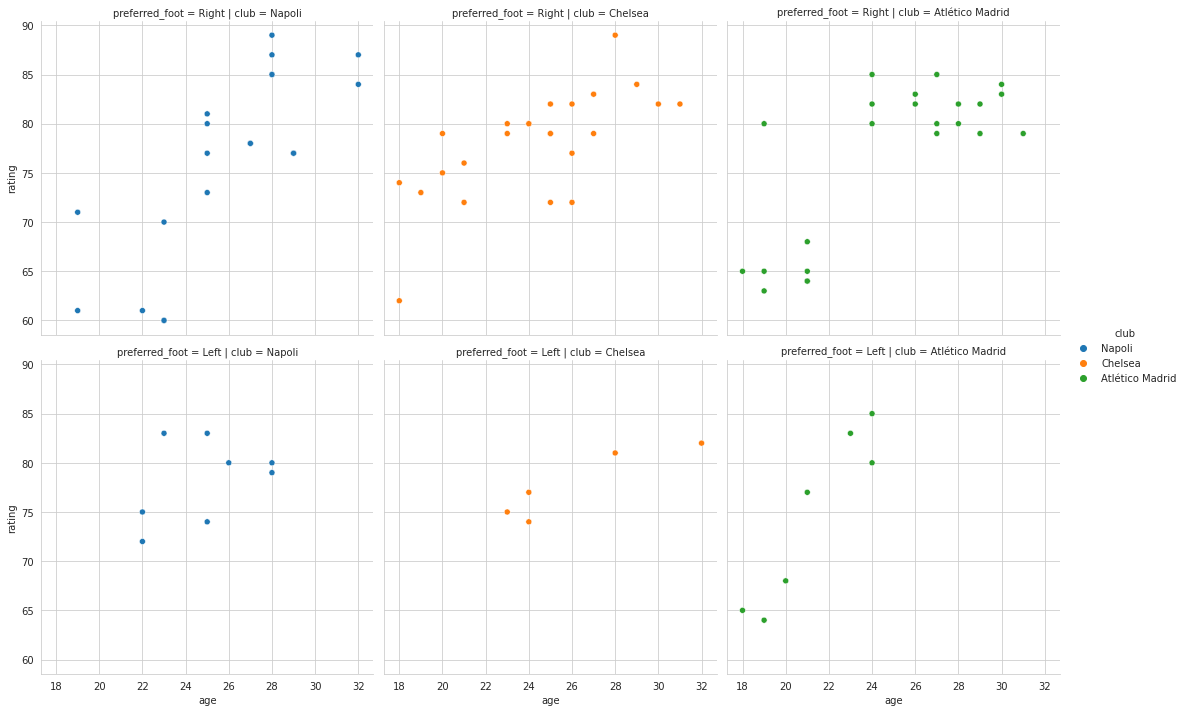

In [23]:
sns.relplot(x="age",
            y="rating",
            data=fifa_subset,
            kind="scatter",
            hue="club",
            col="club",
            row='preferred_foot')
plt.show()


With which seaborn functions can you create relational and categorical plots, 
respectively? **replot()** and **catplot()**


# Chelsea players

In [24]:
fifa_Chelsea =fifa_subset[(fifa_subset['club'] == 'Chelsea')]
fifa_Chelsea.shape

(29, 6)

## Cambiar el color de la paleta para pintar en azul los jugadores diestros y en rojo los zurdos

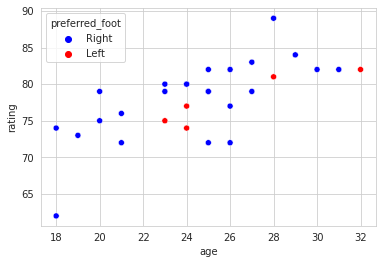

In [25]:
palette_colors = {"Right":"blue", "Left": "red"}
sns.scatterplot(x="age", 
                y="rating", 
                hue="preferred_foot", 
                palette=palette_colors,
                data=fifa_Chelsea)
plt.show()

## Contar las nacionalidades de los jugadores del Chelsea

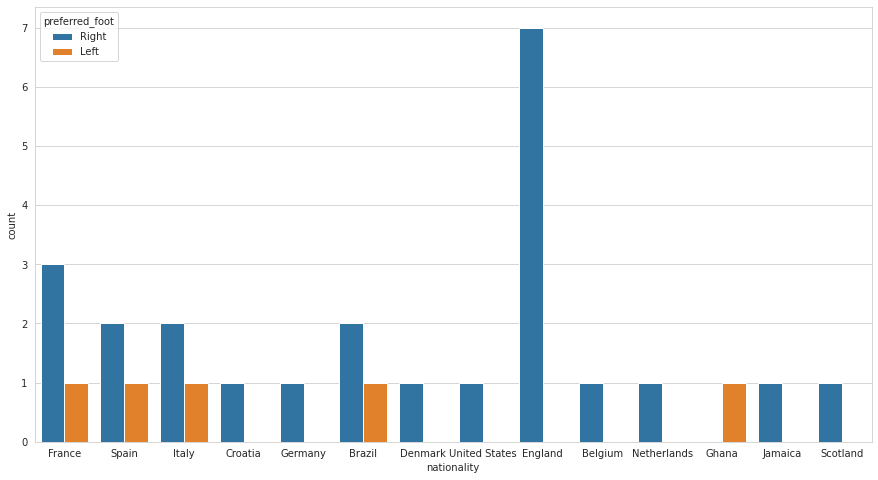

In [48]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='nationality', 
              hue='preferred_foot', 
              data=fifa_Chelsea)
plt.show()